In [80]:
#시작전 설정
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
#한글 설정
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
#경고 메시지 안보이게
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import xlrd
import seaborn as sns

# 1.2000~2020년도 서울시 출산율 사망률 데이터 불러오기

In [81]:
#2000~2010년 출산율 사망율 불러오기 
ingu2000=pd.read_excel("D:/08.ML_DL/seoul/2000.xls",header=None)
ingu2001=pd.read_excel("D:/08.ML_DL/seoul/2001.xls",header=None)
ingu2002=pd.read_excel("D:/08.ML_DL/seoul/2002.xls",header=None)
ingu2003=pd.read_excel("D:/08.ML_DL/seoul/2003.xls",header=None)
ingu2004=pd.read_excel("D:/08.ML_DL/seoul/2004.xls",header=None)
ingu2005=pd.read_excel("D:/08.ML_DL/seoul/2005.xls",header=None)
ingu2006=pd.read_excel("D:/08.ML_DL/seoul/2006.xls",header=None)
ingu2007=pd.read_excel("D:/08.ML_DL/seoul/2007.xls",header=None)
ingu2008=pd.read_excel("D:/08.ML_DL/seoul/2008.xls",header=None)
ingu2009=pd.read_excel("D:/08.ML_DL/seoul/2009.xls",header=None)

In [82]:
#2010~2020년 출산율 사망율 불럴오기 1
ingu2010=pd.read_excel("D:/08.ML_DL/seoul/2010.xls",header=None)
ingu2011=pd.read_excel("D:/08.ML_DL/seoul/2011.xls",header=None)
ingu2012=pd.read_excel("D:/08.ML_DL/seoul/2012.xls",header=None)
ingu2013=pd.read_excel("D:/08.ML_DL/seoul/2013.xls",header=None)
ingu2014=pd.read_excel("D:/08.ML_DL/seoul/2014.xls",header=None)
ingu2015=pd.read_excel("D:/08.ML_DL/seoul/2015.xls",header=None)
ingu2016=pd.read_excel("D:/08.ML_DL/seoul/2016.xls",header=None)
ingu2017=pd.read_excel("D:/08.ML_DL/seoul/2017.xls",header=None)
ingu2018=pd.read_excel("D:/08.ML_DL/seoul/2018.xls",header=None)
ingu2019=pd.read_excel("D:/08.ML_DL/seoul/2019.xls",header=None)
ingu2020=pd.read_excel("D:/08.ML_DL/seoul/2020.xls",header=None)

In [83]:
list=[ingu2000,ingu2001,ingu2002,ingu2003,ingu2004,ingu2005,ingu2006,ingu2007,ingu2008,ingu2009,ingu2010,ingu2011,ingu2012,
      ingu2013,ingu2014,ingu2015,ingu2016,ingu2017,ingu2018,ingu2019,ingu2020]
ingu=pd.concat(list)

In [84]:
ingu

,0,1,2,3,4,5,6,7,8
0,기간,자치구별,월별,출생사망(월별),출생사망(월별),출생사망(월별),출생사망(월별),출생사망(월별),출생사망(월별)
1,기간,자치구별,월별,출생,출생,출생,사망,사망,사망
2,기간,자치구별,월별,계,남자,여자,계,남자,여자
3,2000,합계,계,133154,69406,63748,39296,21387,17909
4,2000,합계,1월,12866,6738,6128,3931,2048,1883
...,...,...,...,...,...,...,...,...,...
336,2020,강동구,8월,232,123,109,159,95,64
337,2020,강동구,9월,241,111,130,167,87,80
338,2020,강동구,10월,207,108,99,182,101,81
339,2020,강동구,11월,201,97,104,167,94,73


# 2.데이터 전처리

In [85]:
ingu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7161 entries, 0 to 340
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7161 non-null   object
 1   1       7161 non-null   object
 2   2       7161 non-null   object
 3   3       7161 non-null   object
 4   4       7161 non-null   object
 5   5       7161 non-null   object
 6   6       7161 non-null   object
 7   7       7161 non-null   object
 8   8       7161 non-null   object
dtypes: object(9)
memory usage: 559.5+ KB


## 2.1필요없는 행 제거

In [86]:
#필요없는 행 제거
ingu=ingu[(ingu[1]!="자치구별")&(ingu[1]!="합계")]
ingu=ingu[(ingu[2]!="계")]
ingu

,0,1,2,3,4,5,6,7,8
17,2000,종로구,1월,141,76,65,97,42,55
18,2000,종로구,2월,175,98,77,74,35,39
19,2000,종로구,3월,211,114,97,71,39,32
20,2000,종로구,4월,176,92,84,80,39,41
21,2000,종로구,5월,143,77,66,66,36,30
...,...,...,...,...,...,...,...,...,...
336,2020,강동구,8월,232,123,109,159,95,64
337,2020,강동구,9월,241,111,130,167,87,80
338,2020,강동구,10월,207,108,99,182,101,81
339,2020,강동구,11월,201,97,104,167,94,73


## 2.2 필요없는 열 제거

In [87]:
ingu.drop(labels=[3,6],axis=1,inplace=True)

In [88]:
ingu

,0,1,2,4,5,7,8
17,2000,종로구,1월,76,65,42,55
18,2000,종로구,2월,98,77,35,39
19,2000,종로구,3월,114,97,39,32
20,2000,종로구,4월,92,84,39,41
21,2000,종로구,5월,77,66,36,30
...,...,...,...,...,...,...,...
336,2020,강동구,8월,123,109,95,64
337,2020,강동구,9월,111,130,87,80
338,2020,강동구,10월,108,99,101,81
339,2020,강동구,11월,97,104,94,73


## 2.3 컬럼 이름 설정 및 인덱스 정리

In [89]:
ingu.columns=["년도","지역구","월","남자 출생수","여자 출생수","남자 사망수","여자 사망수"]
ingu

,년도,지역구,월,남자 출생수,여자 출생수,남자 사망수,여자 사망수
17,2000,종로구,1월,76,65,42,55
18,2000,종로구,2월,98,77,35,39
19,2000,종로구,3월,114,97,39,32
20,2000,종로구,4월,92,84,39,41
21,2000,종로구,5월,77,66,36,30
...,...,...,...,...,...,...,...
336,2020,강동구,8월,123,109,95,64
337,2020,강동구,9월,111,130,87,80
338,2020,강동구,10월,108,99,101,81
339,2020,강동구,11월,97,104,94,73


In [90]:
ingu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6300 entries, 17 to 340
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      6300 non-null   object
 1   지역구     6300 non-null   object
 2   월       6300 non-null   object
 3   남자 출생수  6300 non-null   object
 4   여자 출생수  6300 non-null   object
 5   남자 사망수  6300 non-null   object
 6   여자 사망수  6300 non-null   object
dtypes: object(7)
memory usage: 393.8+ KB


In [91]:
#인덱스 재정리 
ingu.shape
ingu.shape[0]
ingu.index=range(ingu.shape[0])
ingu

,년도,지역구,월,남자 출생수,여자 출생수,남자 사망수,여자 사망수
0,2000,종로구,1월,76,65,42,55
1,2000,종로구,2월,98,77,35,39
2,2000,종로구,3월,114,97,39,32
3,2000,종로구,4월,92,84,39,41
4,2000,종로구,5월,77,66,36,30
...,...,...,...,...,...,...,...
6295,2020,강동구,8월,123,109,95,64
6296,2020,강동구,9월,111,130,87,80
6297,2020,강동구,10월,108,99,101,81
6298,2020,강동구,11월,97,104,94,73


## 2.4 데이터 형변환 및 함수 활용 변수 변경

In [92]:
def function(data):
    data["월"]=data["월"].replace("월","")
    return data

In [93]:
ingu=ingu.apply(function,axis=1)
ingu

,년도,지역구,월,남자 출생수,여자 출생수,남자 사망수,여자 사망수
0,2000,종로구,1,76,65,42,55
1,2000,종로구,2,98,77,35,39
2,2000,종로구,3,114,97,39,32
3,2000,종로구,4,92,84,39,41
4,2000,종로구,5,77,66,36,30
...,...,...,...,...,...,...,...
6295,2020,강동구,8,123,109,95,64
6296,2020,강동구,9,111,130,87,80
6297,2020,강동구,10,108,99,101,81
6298,2020,강동구,11,97,104,94,73


In [94]:
#데이터형 변환
ingu["년도"]=ingu["년도"].astype("int")
ingu["월"]=ingu["월"].astype("int")
ingu["남자 출생수"]=ingu["남자 출생수"].astype("int")
ingu["여자 출생수"]=ingu["여자 출생수"].astype("int")
ingu["남자 사망수"]=ingu["남자 사망수"].astype("int")
ingu["여자 사망수"]=ingu["여자 사망수"].astype("int")

In [95]:
ingu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      6300 non-null   int32 
 1   지역구     6300 non-null   object
 2   월       6300 non-null   int32 
 3   남자 출생수  6300 non-null   int32 
 4   여자 출생수  6300 non-null   int32 
 5   남자 사망수  6300 non-null   int32 
 6   여자 사망수  6300 non-null   int32 
dtypes: int32(6), object(1)
memory usage: 197.0+ KB


In [96]:
ingu

,년도,지역구,월,남자 출생수,여자 출생수,남자 사망수,여자 사망수
0,2000,종로구,1,76,65,42,55
1,2000,종로구,2,98,77,35,39
2,2000,종로구,3,114,97,39,32
3,2000,종로구,4,92,84,39,41
4,2000,종로구,5,77,66,36,30
...,...,...,...,...,...,...,...
6295,2020,강동구,8,123,109,95,64
6296,2020,강동구,9,111,130,87,80
6297,2020,강동구,10,108,99,101,81
6298,2020,강동구,11,97,104,94,73


## 2.5 groupby 활용 데이터 전처리

In [97]:
ingu_y=ingu.groupby(["년도"]).sum()
ingu_y

,월,남자 출생수,여자 출생수,남자 사망수,여자 사망수
년도,,,,,
2000,1950,69406,63748,21387,17909
2001,1950,59476,55288,21121,17334
2002,1950,53105,48903,21254,17671
2003,1950,52191,49036,20913,17155
2004,1950,51453,48375,21226,17048
2005,1950,46679,43789,21461,17290
2006,1950,48520,45402,21311,17208
2007,1950,52139,49110,21748,17268
2008,1950,48826,45910,21455,16843


In [98]:
ingu_b=ingu_y.drop("월",axis=1)
ingu_b

,남자 출생수,여자 출생수,남자 사망수,여자 사망수
년도,,,,
2000,69406,63748,21387,17909
2001,59476,55288,21121,17334
2002,53105,48903,21254,17671
2003,52191,49036,20913,17155
2004,51453,48375,21226,17048
2005,46679,43789,21461,17290
2006,48520,45402,21311,17208
2007,52139,49110,21748,17268
2008,48826,45910,21455,16843


In [109]:
ingu_g=ingu.groupby(['지역구']).sum()
ingu_g=ingu_g.drop(["년도","월"],axis=1)
ingu_g["총 출생수"]=ingu_g["여자 출생수"]+ingu_g["남자 출생수"]
ingu_g["총 사망수"]=ingu_g["여자 사망수"]+ingu_g["남자 사망수"]
ingu_g=ingu_g.reset_index()
ingu_g

,지역구,남자 출생수,여자 출생수,남자 사망수,여자 사망수,총 출생수,총 사망수
0,강남구,46621,43768,18180,17660,90389,35840
1,강동구,43523,40795,20287,16438,84318,36725
2,강북구,27929,26203,20732,14959,54132,35691
3,강서구,58750,55494,26413,22056,114244,48469
4,관악구,49707,46841,23802,17818,96548,41620
5,광진구,36160,33735,15518,12076,69895,27594
6,구로구,46484,43751,19312,14506,90235,33818
7,금천구,22126,20998,12920,9456,43124,22376
8,노원구,57338,54140,29424,25013,111478,54437
9,도봉구,31333,29073,18441,14671,60406,33112


In [100]:
ingu_z=ingu.groupby(["년도","지역구"]).sum()
ingu_z

월  남자 출생수  여자 출생수  남자 사망수  여자 사망수
년도   지역구                                    
2000 강남구  78    3299    2955     870     852
     강동구  78    3140    2867     935     794
     강북구  78    2003    1802     876     664
     강서구  78    3751    3389    1044     832
     관악구  78    3900    3467    1066     807
...       ..     ...     ...     ...     ...
2020 용산구  78     611     565     628     517
     은평구  78    1092    1052    1485    1138
     종로구  78     268     261     519     348
     중구   78     348     342     409     314
     중랑구  78     957     916    1288     957

[525 rows x 5 columns]

In [101]:
ingu_z=ingu_z.reset_index()

In [102]:
ingu_z

,년도,지역구,월,남자 출생수,여자 출생수,남자 사망수,여자 사망수
0,2000,강남구,78,3299,2955,870,852
1,2000,강동구,78,3140,2867,935,794
2,2000,강북구,78,2003,1802,876,664
3,2000,강서구,78,3751,3389,1044,832
4,2000,관악구,78,3900,3467,1066,807
...,...,...,...,...,...,...,...
520,2020,용산구,78,611,565,628,517
521,2020,은평구,78,1092,1052,1485,1138
522,2020,종로구,78,268,261,519,348
523,2020,중구,78,348,342,409,314


## 2.6 rest_index() 활용

In [103]:
ingu_b=ingu_b.reset_index()
ingu_b

,년도,남자 출생수,여자 출생수,남자 사망수,여자 사망수
0,2000,69406,63748,21387,17909
1,2001,59476,55288,21121,17334
2,2002,53105,48903,21254,17671
3,2003,52191,49036,20913,17155
4,2004,51453,48375,21226,17048
5,2005,46679,43789,21461,17290
6,2006,48520,45402,21311,17208
7,2007,52139,49110,21748,17268
8,2008,48826,45910,21455,16843
9,2009,45963,43631,21955,16835


# 3.데이터 시각화

## 3-1.파이플롯

### 1) 연도별 남,여 출생사망수(2000~2020년)

In [77]:
for i in range(len(ingu_y)):
    title = ingu_y.iloc[i,1:5].name
    label = list(ingu_y.iloc[i,1:5].index)
    size = [int(x) for x in list(ingu_y.iloc[i,1:5])]
    color = ['teal', 'darkorange', 'powderblue', 'blanchedalmond']
    plt.pie(size, labels=label, colors=color, autopct='%1.1f%%',textprops = {'fontsize':12}, pctdistance=0.5)
    plt.title(str(title)+"년도", size=16)
    plt.axis('equal')
    plt.show()

TypeError: 'list' object is not callable

## 3-2.지도시각화

### 0)총 출생수와 총 사망수

In [110]:
# 지역구별 남자 출생수(2000~2019년)
# 지도시각화 툴팁 추가

from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup
m = folium.Map(location=[37.562225, 126.978555], tiles='cartodb positron', zoom_start=11) # stamen toner, stamen terrain, cartodb positron

# choropleth 레이어
choropleth = folium.Choropleth(
    geo_data=state_geo,
    name='총 출생수',
    data=ingu_g,
    columns=['지역구', '총 출생수'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '총 출생수(명)',
)
m.add_child(choropleth)

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

m

In [111]:
# 지역구별 남자 출생수(2000~2019년)
# 지도시각화 툴팁 추가

from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup
m = folium.Map(location=[37.562225, 126.978555], tiles='cartodb positron', zoom_start=11) # stamen toner, stamen terrain, cartodb positron

# choropleth 레이어
choropleth = folium.Choropleth(
    geo_data=state_geo,
    name='총 사망수',
    data=ingu_g,
    columns=['지역구', '총 사망수'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '총 사망수(명)',
)
m.add_child(choropleth)

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

m

In [58]:
import folium
from folium import plugins

In [59]:
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [60]:
# 서울시 지도 불러오기
m = folium.Map(location=[37.562225, 126.978555], tiles="OpenStreetMap", zoom_start=11)
m

### 1) 지역구별 남자 출생수(2000~2019년)

In [61]:
# 지역구별 남자 출생수(2000~2019년)
# 지도시각화 툴팁 추가

from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup
m = folium.Map(location=[37.562225, 126.978555], tiles='cartodb positron', zoom_start=11) # stamen toner, stamen terrain, cartodb positron

# choropleth 레이어
choropleth = folium.Choropleth(
    geo_data=state_geo,
    name='남자 출생수',
    data=ingu_g,
    columns=['지역구', '남자 출생수'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '남자 출생수(명)',
)
m.add_child(choropleth)

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

m

### 2) 지역구별 남자 출생수(2000~2019년) +팝업툴팁

In [62]:
# 지역구별 남자 출생수(2000~2019년)
# 지도시각화 팝업,툴팁 추가

from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup
m = folium.Map(location=[37.562225, 126.978555], tiles='cartodb positron', zoom_start=11) # stamen toner, stamen terrain, cartodb positron

# Popup and Tooltips
popup = GeoJsonPopup(
    fields=['name','code'],
    aliases=['지역구','지역코드'], 
    localize=True,
    labels=True,
#    style="background-color: white;",
)
tooltip = GeoJsonTooltip(
    fields=['name','code'],
    aliases=['지역구','지역코드'], 
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 1px solid black;
        border-radius: 2px;
        box-shadow: 3px;
    """,
    max_width=800,
)
# choropleth 레이어
g = folium.Choropleth(
    geo_data=state_geo,
    name='남자 출생수',
    data=ingu,
    columns=['지역구', '남자 출생수'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '남자 출생수(명)',
).add_to(m)
folium.GeoJson(
    state_geo,
    style_function=lambda feature: {
        'fillColor': '#ffff00',
        'color': 'black',
        'weight': 0.2,
        'dashArray': '5, 5'
    },
    tooltip=tooltip,
    popup=popup).add_to(g)
m

### 3) 지역구별 남,여 출생수와 사망수(2000~2019년) + 툴팁

In [64]:
# 지역구별 남자 출생수(2000~2019년)
# 지도시각화 툴팁 추가

from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup
m = folium.Map(location=[37.562225, 126.978555], tiles='cartodb positron', zoom_start=11) # stamen toner, stamen terrain, cartodb positron

# choropleth 레이어
choropleth = folium.Choropleth(
    geo_data=state_geo,
    name='남자 출생수',
    data=ingu_g,
    columns=['지역구', '남자 출생수'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '남자 출생수(명)',
)
choropleth1 = folium.Choropleth(
    geo_data=state_geo,
    name='여자 출생수',
    data=ingu_g,
    columns=['지역구', '여자 출생수'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '여자 출생수(명)',
)
choropleth2 = folium.Choropleth(
    geo_data=state_geo,
    name='남자 사망수',
    data=ingu_g,
    columns=['지역구', '남자 사망수'],
    key_on='feature.properties.name',
    fill_color='Purples',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '남자 사망수(명)',
)
choropleth3 = folium.Choropleth(
    geo_data=state_geo,
    name='여자 사망수',
    data=ingu_g,
    columns=['지역구', '여자 사망수'],
    key_on='feature.properties.name',
    fill_color='YlOrBr',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '여자 사망수(명)',
)

m.add_child(choropleth)
m.add_child(choropleth1)
m.add_child(choropleth2)
m.add_child(choropleth3)

folium.LayerControl().add_to(m)

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))
choropleth1.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))
choropleth2.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))
choropleth3.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

m

### 4) 지역구별 남,여 출생수(2000~2019년) + 툴팁

In [65]:
# 지역구별 남,여 출생수(2000~2019년)
# 지도시각화 툴팁 추가

from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup
m = folium.Map(location=[37.562225, 126.978555], tiles='cartodb positron', zoom_start=11) # stamen toner, stamen terrain, cartodb positron

# choropleth 레이어
choropleth1 = folium.Choropleth(
    geo_data=state_geo,
    name='여자 출생수',
    data=ingu_g,
    columns=['지역구', '여자 출생수'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '여자 출생수(명)',
)
choropleth2 = folium.Choropleth(
    geo_data=state_geo,
    name='남자 출생수',
    data=ingu_g,
    columns=['지역구', '남자 출생수'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '남자 출생수(명)',
)

m.add_child(choropleth1)
m.add_child(choropleth2)

folium.LayerControl().add_to(m)

style_function = "font-size: 15px; font-weight: bold"
choropleth1.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))
choropleth2.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

m

### 5) 지역구별 남,여 사망수(2000~2019년) + 툴팁

In [66]:
# 지역구별 남,여 사망수(2000~2019년)
# 지도시각화 툴팁 추가

from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup
m = folium.Map(location=[37.562225, 126.978555], tiles='cartodb positron', zoom_start=11) # stamen toner, stamen terrain, cartodb positron

# choropleth 레이어
choropleth1 = folium.Choropleth(
    geo_data=state_geo,
    name='여자 사망수',
    data=ingu_g,
    columns=['지역구', '여자 사망수'],
    key_on='feature.properties.name',
    fill_color='YlOrBr',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '여자 사망수(명)',
)
choropleth2 = folium.Choropleth(
    geo_data=state_geo,
    name='남자 사망수',
    data=ingu_g,
    columns=['지역구', '남자 사망수'],
    key_on='feature.properties.name',
    fill_color='Purples',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '남자 사망수(명)',
)

m.add_child(choropleth1)
m.add_child(choropleth2)

folium.LayerControl().add_to(m)

style_function = "font-size: 15px; font-weight: bold"
choropleth1.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))
choropleth2.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

m

### 6) 지역구별 남,여 합계 출산수(2000~2019년) + 툴팁

In [67]:
ingu_s = ingu[['지역구']]
ingu_s['출생수'] = (ingu['남자 출생수'] + ingu['여자 출생수'])
ingu_s['사망수'] = (ingu['남자 사망수'] + ingu['여자 사망수'])
ingu_s

,지역구,출생수,사망수
0,종로구,141,97
1,종로구,175,74
2,종로구,211,71
3,종로구,176,80
4,종로구,143,66
...,...,...,...
6295,강동구,232,159
6296,강동구,241,167
6297,강동구,207,182
6298,강동구,201,167


In [69]:
# 지역구별 총 출생,사망수(2000~2019년)
# 지도시각화 툴팁 추가

from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup
m = folium.Map(location=[37.562225, 126.978555], tiles='cartodb positron', zoom_start=11) # stamen toner, stamen terrain, cartodb positron

# choropleth 레이어
choropleth = folium.Choropleth(
    geo_data=state_geo,
    name='출생수',
    data=ingu_s,
    columns=['지역구', '출생수'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '총 출생수(명)',
)
choropleth1 = folium.Choropleth(
    geo_data=state_geo,
    name='사망수',
    data=ingu_s,
    columns=['지역구', '사망수'],
    key_on='feature.properties.name',
    fill_color='Purples',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '총 사망수(명)',
)

m.add_child(choropleth)
m.add_child(choropleth1)

folium.LayerControl().add_to(m)

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))
choropleth1.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

m

In [70]:
# 지역구별 총 출생,사망수(2000~2019년)
# 지도시각화 툴팁 추가

from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup
m = folium.Map(location=[37.562225, 126.978555], tiles='cartodb positron', zoom_start=11) # stamen toner, stamen terrain, cartodb positron

# choropleth 레이어

choropleth1 = folium.Choropleth(
    geo_data=state_geo,
    name='사망수',
    data=ingu_s,
    columns=['지역구', '사망수'],
    key_on='feature.properties.name',
    fill_color='Purples',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '총 사망수(명)',
)

m.add_child(choropleth1)

folium.LayerControl().add_to(m)

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))
choropleth1.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

m

## 3-3. matplotlib 시각화

### 1) 연도별 인구 증가현황

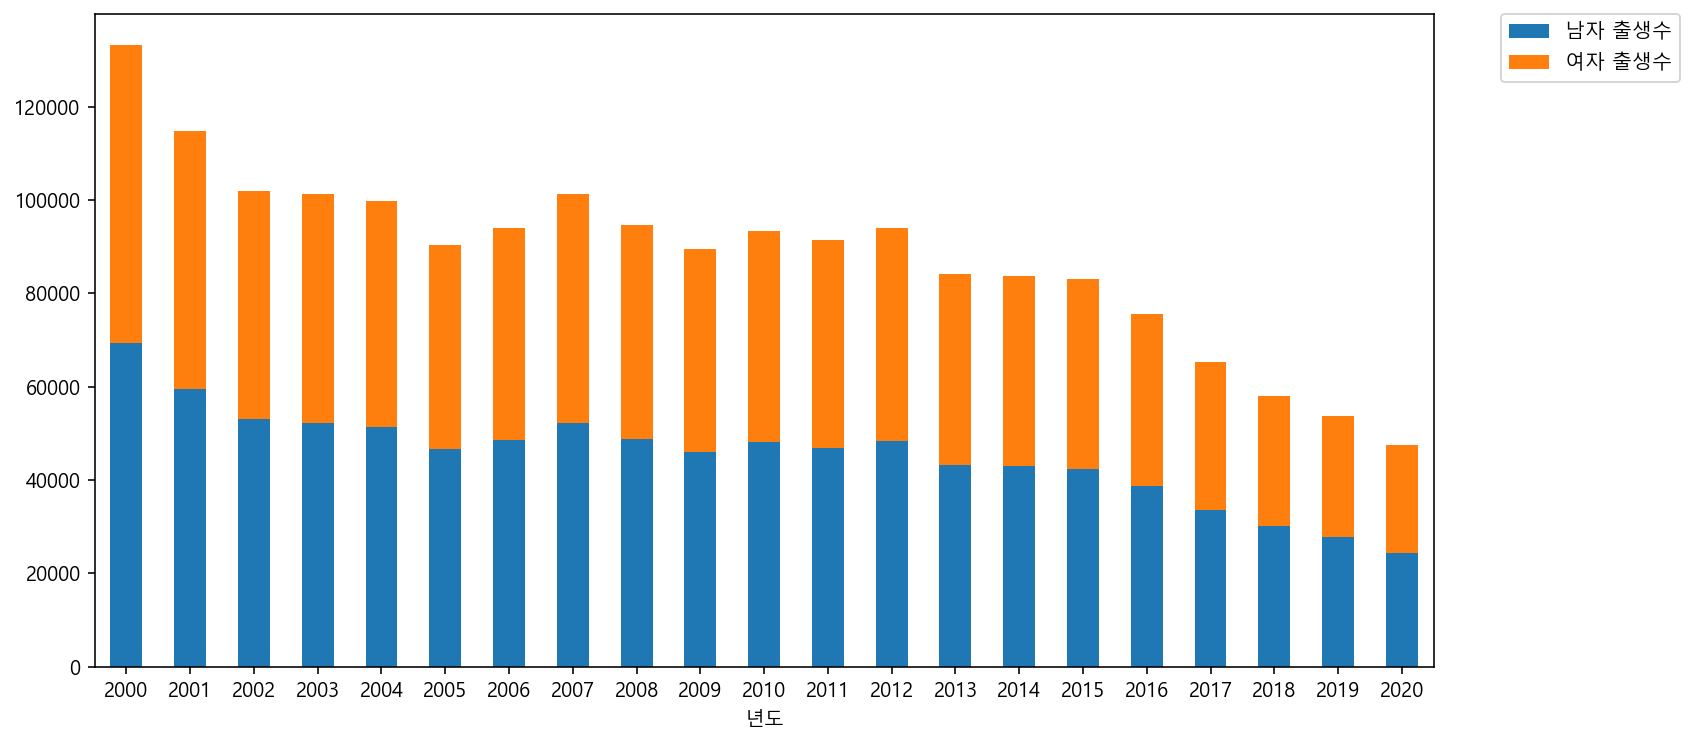

In [74]:
g = ingu_y[ingu_y.columns.difference(['월','남자 사망수','여자 사망수'])].groupby(['년도']).sum()
g.plot(kind='bar', rot=0, figsize=(12,6), stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### 2) 연도별 인구 감소현황

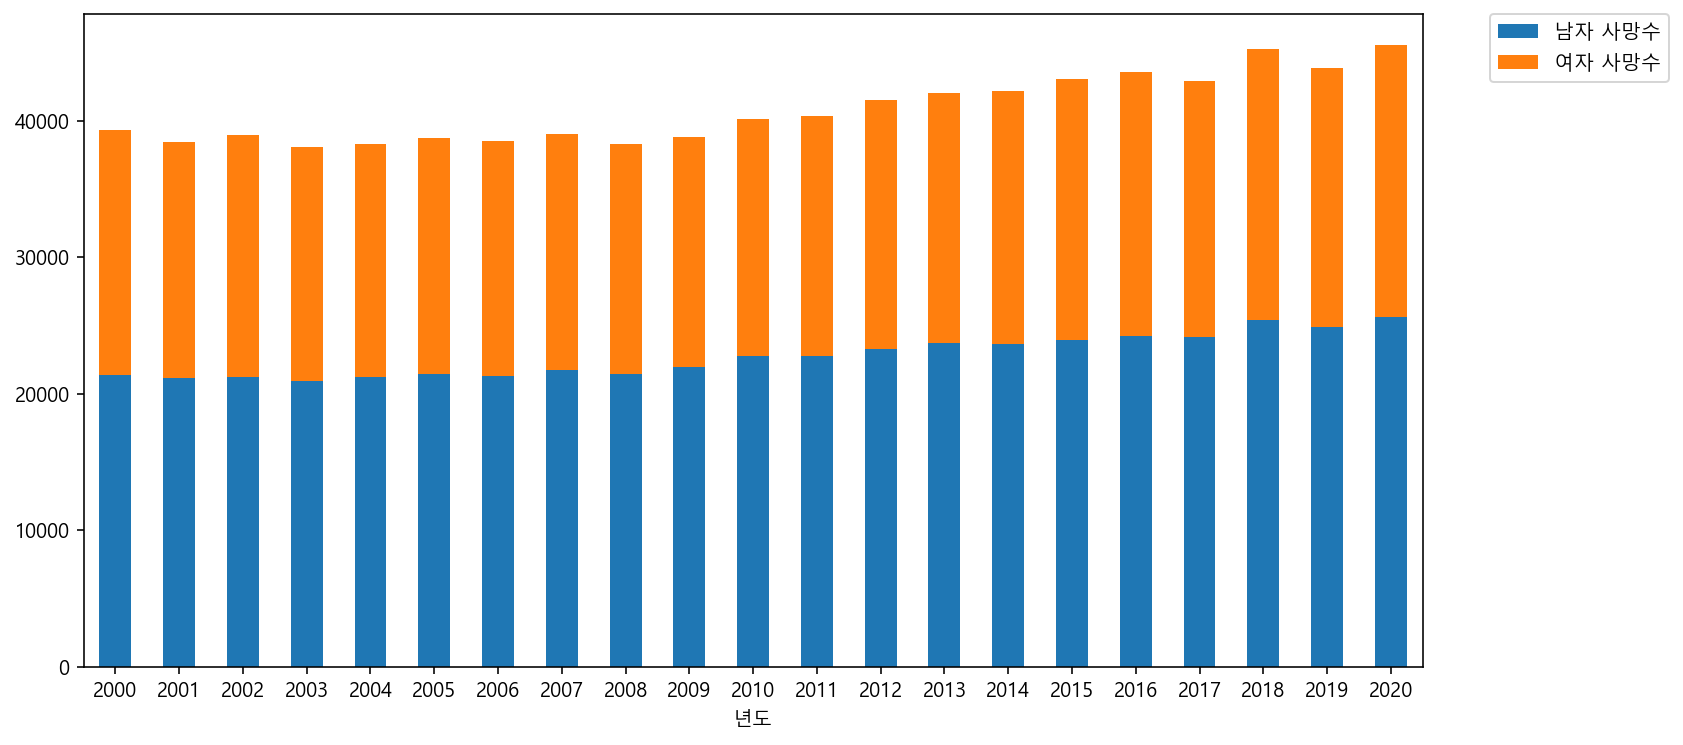

In [75]:
g = ingu_y[ingu_y.columns.difference(['월','남자 출생수','여자 출생수'])].groupby(['년도']).sum()
g.plot(kind='bar', rot=0, figsize=(12,6), stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()